In [1]:
import colorsys
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
stations = pd.read_csv('london.stations.csv')
stations

,id,latitude,longitude,name,display_name,zone,total_lines,rail
0,1,51.5028,-0.2801,Acton Town,Acton<br />Town,3.0,2,0
1,2,51.5143,-0.0755,Aldgate,NaN,1.0,2,0
2,3,51.5154,-0.0726,Aldgate East,Aldgate<br />East,1.0,2,0
3,4,51.5107,-0.0130,All Saints,All<br />Saints,2.0,1,0
4,5,51.5407,-0.2997,Alperton,NaN,4.0,1,0
...,...,...,...,...,...,...,...,...
297,69,51.4740,-0.0216,Deptford Bridge,Deptford<br />Bridge,2.5,1,0
298,86,51.4693,-0.0174,Elverson Road,Elverson<br />Road,2.5,1,0
299,152,51.4657,-0.0142,Lewisham,NaN,2.5,1,1
300,174,51.4767,-0.0327,New Cross,New<br />Cross,2.0,1,1


In [3]:
links = pd.read_csv('london.connections.csv')
links

,station1,station2,line,time
0,11,163,1,1
1,11,212,1,2
2,49,87,1,1
3,49,197,1,2
4,82,163,1,2
...,...,...,...,...
401,198,272,11,1
402,198,273,11,3
403,224,260,11,3
404,245,272,11,3


In [4]:
G = nx.Graph()
G.add_nodes_from(stations['id'])
G.add_edges_from(list(zip(links['station1'], links['station2'])))



In [11]:
G.edges

EdgeView([(1, 52), (1, 73), (1, 234), (1, 265), (2, 156), (2, 263), (3, 263), (3, 295), (3, 156), (4, 70), (4, 201), (5, 194), (5, 252), (7, 145), (7, 188), (8, 124), (8, 264), (9, 31), (9, 232), (10, 95), (10, 128), (11, 163), (11, 212), (11, 83), (11, 104), (11, 28), (11, 249), (11, 94), (12, 56), (12, 257), (13, 156), (13, 250), (13, 225), (13, 157), (13, 167), (13, 279), (14, 92), (14, 167), (15, 78), (15, 269), (16, 91), (16, 173), (17, 110), (17, 293), (17, 74), (18, 186), (18, 193), (19, 97), (20, 65), (20, 217), (21, 67), (21, 269), (22, 47), (22, 111), (24, 156), (24, 164), (25, 161), (25, 255), (26, 260), (26, 274), (27, 79), (27, 201), (28, 162), (28, 192), (28, 107), (29, 84), (29, 157), (30, 176), (30, 190), (31, 303), (32, 70), (32, 204), (33, 36), (33, 164), (34, 100), (34, 119), (36, 289), (38, 58), (38, 81), (39, 128), (39, 145), (40, 47), (40, 89), (40, 139), (40, 170), (42, 120), (42, 292), (42, 41), (42, 183), (44, 161), (44, 166), (45, 207), (45, 243), (48, 126), (

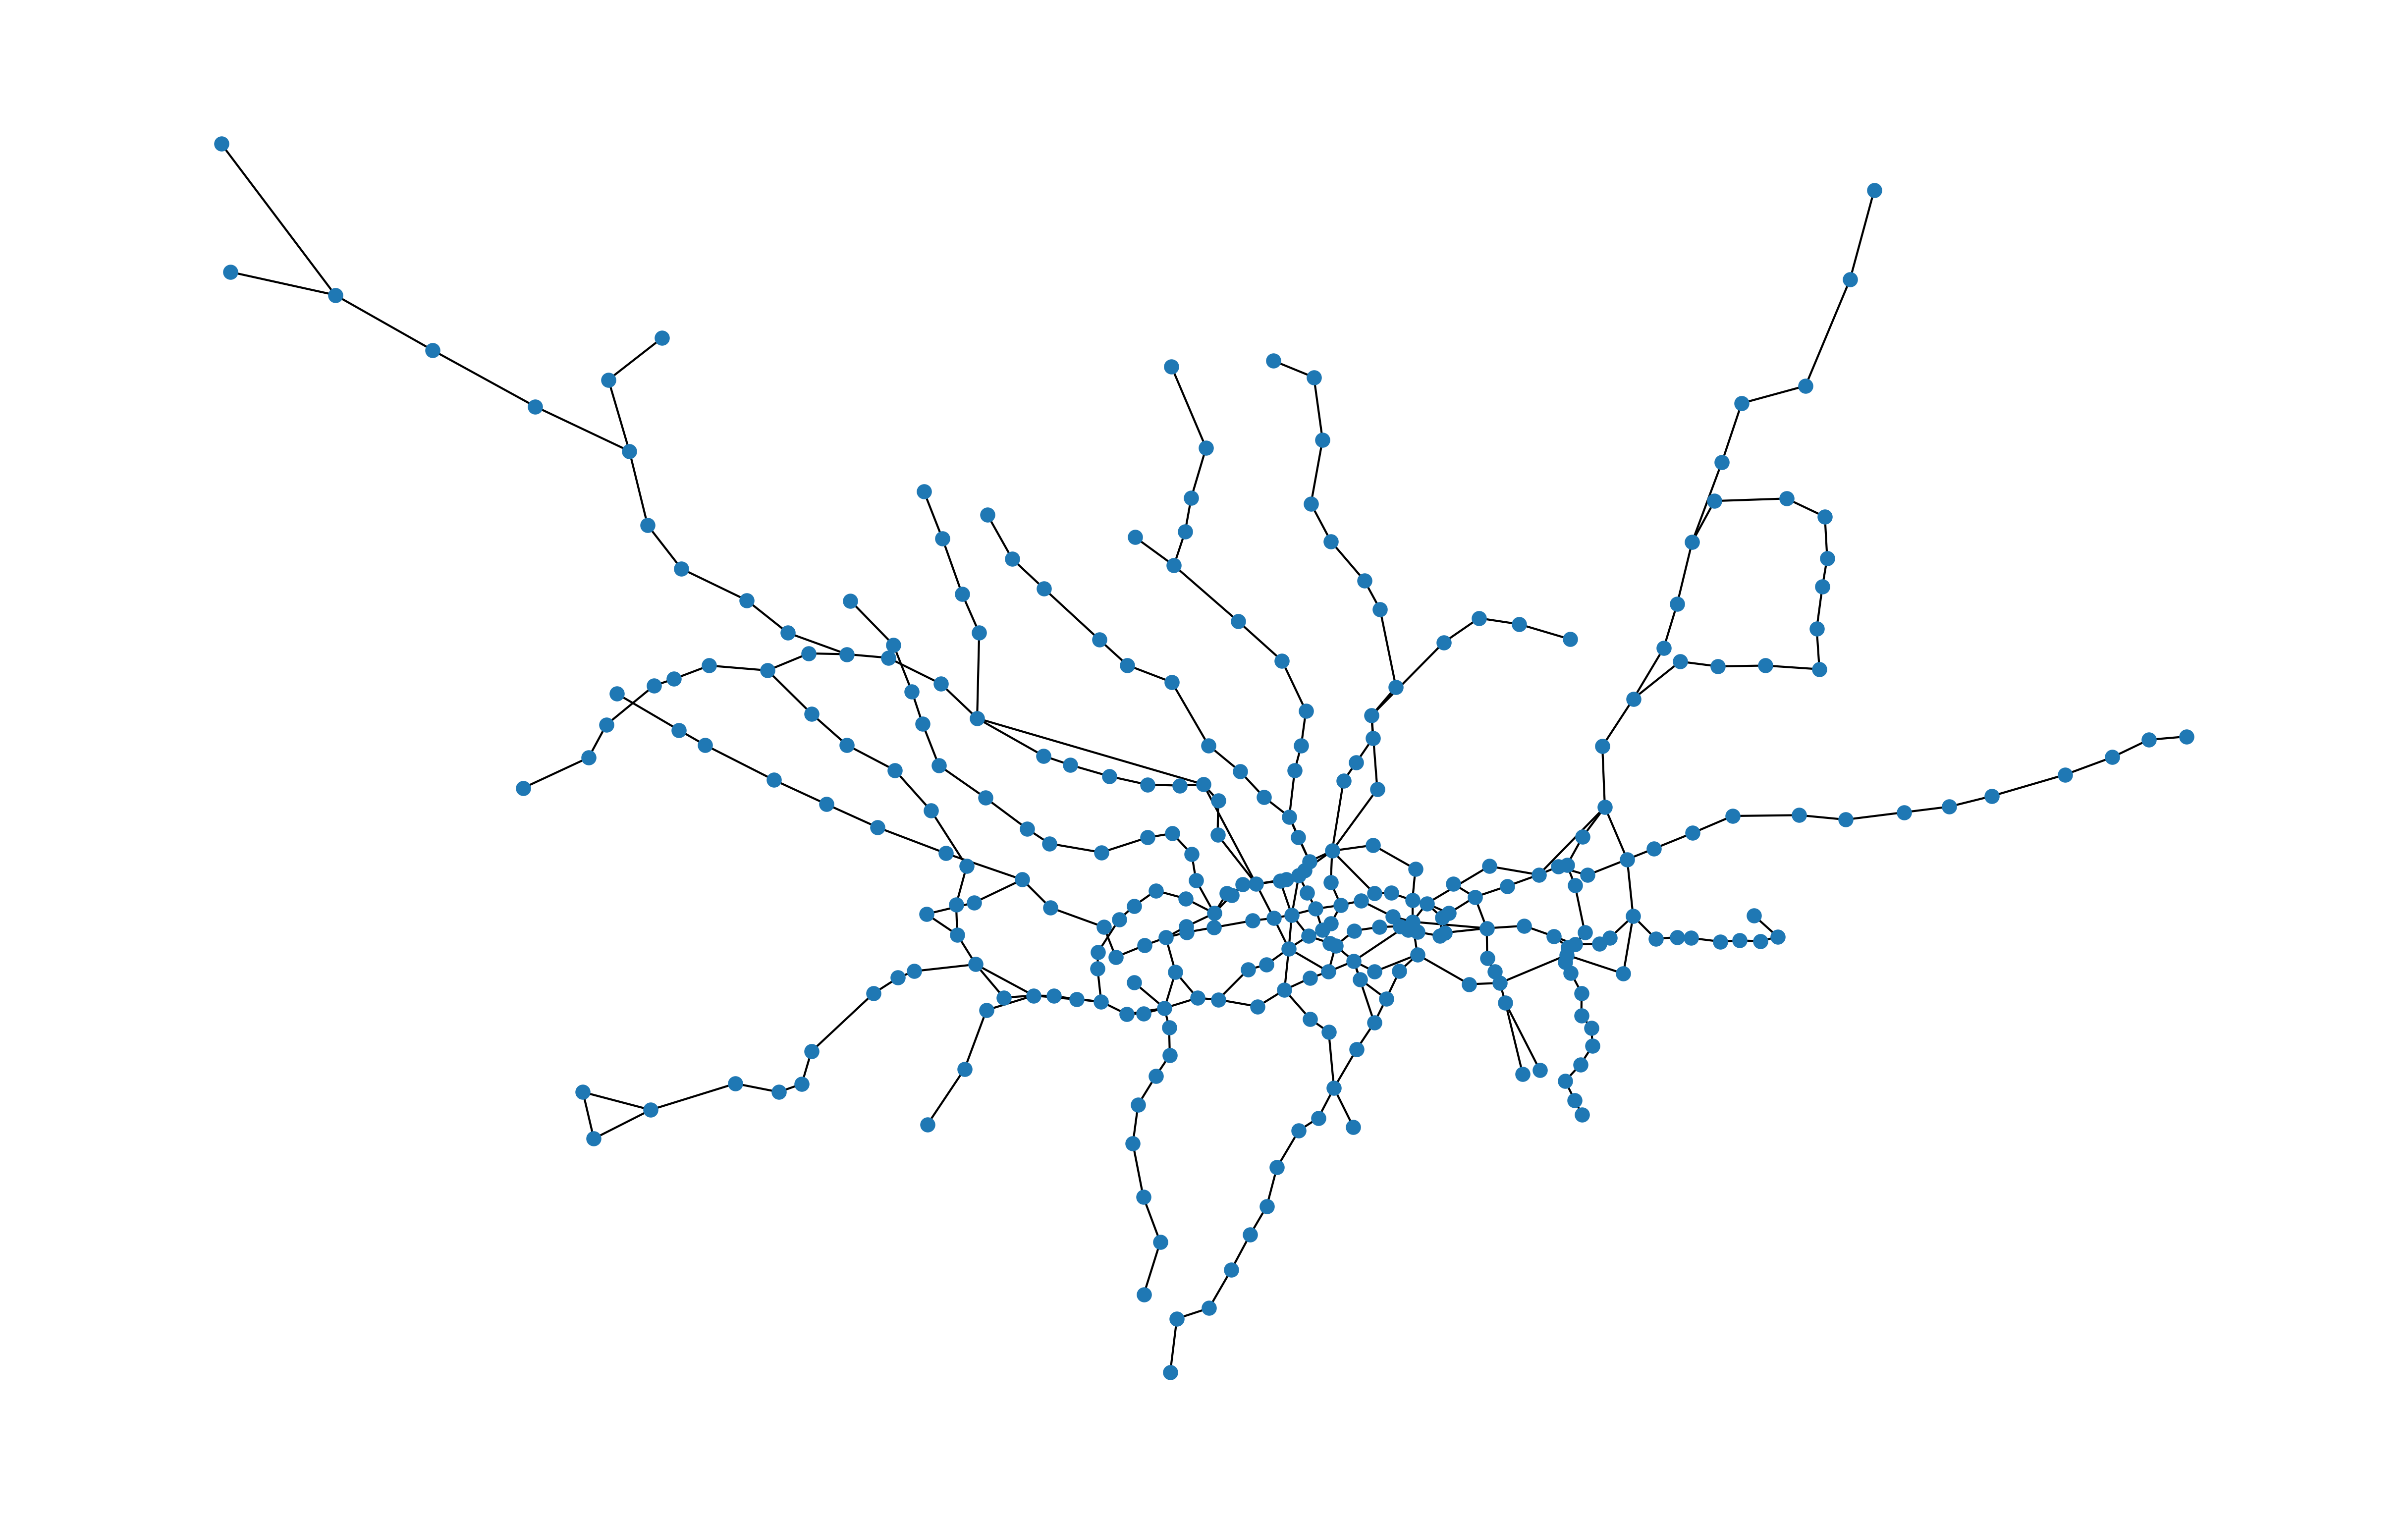

In [34]:
plt.figure(figsize=(16,10), dpi=300)

coords = list(zip(stations['longitude'],stations['latitude']))
pos = dict(zip(stations['id'], coords))
nx.draw(G,pos,node_size = 40)
nx.draw_networkx_edge_labels(G, pos, edge_labels=)

In [23]:
G.edges

EdgeView([(1, 52), (1, 73), (1, 234), (1, 265), (2, 156), (2, 263), (3, 263), (3, 295), (3, 156), (4, 70), (4, 201), (5, 194), (5, 252), (7, 145), (7, 188), (8, 124), (8, 264), (9, 31), (9, 232), (10, 95), (10, 128), (11, 163), (11, 212), (11, 83), (11, 104), (11, 28), (11, 249), (11, 94), (12, 56), (12, 257), (13, 156), (13, 250), (13, 225), (13, 157), (13, 167), (13, 279), (14, 92), (14, 167), (15, 78), (15, 269), (16, 91), (16, 173), (17, 110), (17, 293), (17, 74), (18, 186), (18, 193), (19, 97), (20, 65), (20, 217), (21, 67), (21, 269), (22, 47), (22, 111), (24, 156), (24, 164), (25, 161), (25, 255), (26, 260), (26, 274), (27, 79), (27, 201), (28, 162), (28, 192), (28, 107), (29, 84), (29, 157), (30, 176), (30, 190), (31, 303), (32, 70), (32, 204), (33, 36), (33, 164), (34, 100), (34, 119), (36, 289), (38, 58), (38, 81), (39, 128), (39, 145), (40, 47), (40, 89), (40, 139), (40, 170), (42, 120), (42, 292), (42, 41), (42, 183), (44, 161), (44, 166), (45, 207), (45, 243), (48, 126), (

In [27]:
import random
for u, v in G.edges:
    G[u][v]['weight'] = random.randint(3,7)

In [31]:
nx.get_edge_attributes(G, 'weight')

{(1, 52): 7,
 (1, 73): 4,
 (1, 234): 4,
 (1, 265): 5,
 (2, 156): 6,
 (2, 263): 3,
 (3, 263): 3,
 (3, 295): 7,
 (3, 156): 6,
 (4, 70): 7,
 (4, 201): 4,
 (5, 194): 6,
 (5, 252): 7,
 (7, 145): 4,
 (7, 188): 7,
 (8, 124): 4,
 (8, 264): 7,
 (9, 31): 7,
 (9, 232): 5,
 (10, 95): 5,
 (10, 128): 4,
 (11, 163): 4,
 (11, 212): 7,
 (11, 83): 7,
 (11, 104): 4,
 (11, 28): 4,
 (11, 249): 3,
 (11, 94): 3,
 (12, 56): 6,
 (12, 257): 4,
 (13, 156): 7,
 (13, 250): 4,
 (13, 225): 3,
 (13, 157): 7,
 (13, 167): 4,
 (13, 279): 4,
 (14, 92): 6,
 (14, 167): 7,
 (15, 78): 6,
 (15, 269): 5,
 (16, 91): 4,
 (16, 173): 5,
 (17, 110): 6,
 (17, 293): 5,
 (17, 74): 3,
 (18, 186): 5,
 (18, 193): 7,
 (19, 97): 6,
 (20, 65): 5,
 (20, 217): 4,
 (21, 67): 6,
 (21, 269): 4,
 (22, 47): 3,
 (22, 111): 6,
 (24, 156): 3,
 (24, 164): 5,
 (25, 161): 7,
 (25, 255): 6,
 (26, 260): 7,
 (26, 274): 6,
 (27, 79): 5,
 (27, 201): 6,
 (28, 162): 5,
 (28, 192): 3,
 (28, 107): 4,
 (29, 84): 5,
 (29, 157): 6,
 (30, 176): 5,
 (30, 190): 7,
 (3